<a href="https://colab.research.google.com/github/dgizdevans/master/blob/main/ml/ML_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

In [ ]:
## Load the dataset
# Adjust the file path as necessary
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
data = pd.read_excel(url)

# Display the first few rows
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
## Basic Information and Overview
# Display first few rows

print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   MonthYear    541909 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), period[M](1)
memory usage: 37.2+ MB


In [ ]:
# Basic statistics
print("\nSummary Statistics:")
display(data.describe())


Summary Statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# Check missing values
print("\nColumns with Missing Values:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Columns with Missing Values:
Description      1454
CustomerID     135080
dtype: int64


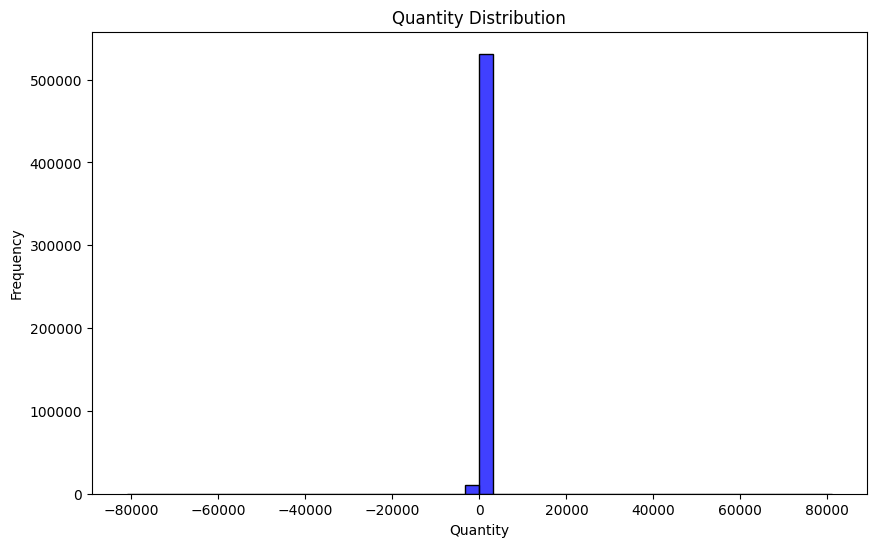

In [ ]:
# Histogram of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], bins=50, kde=False, color='blue')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

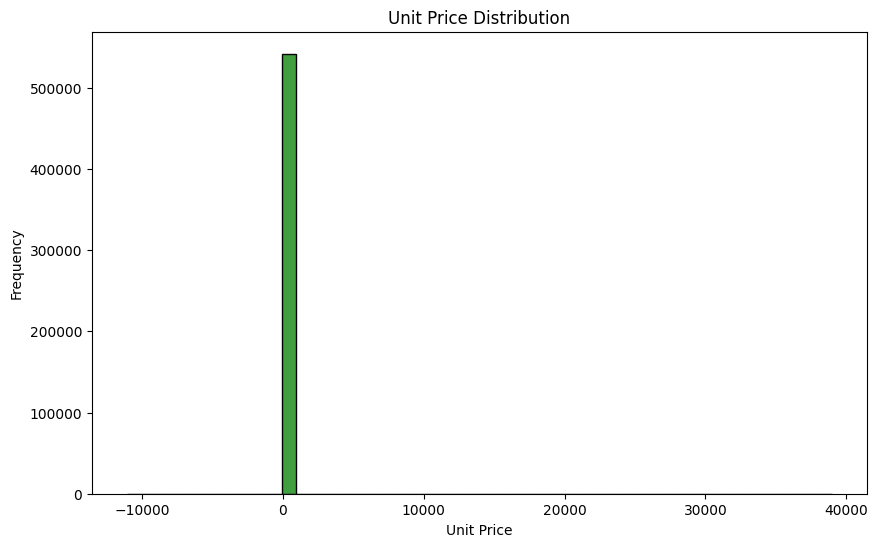

In [ ]:
# Histogram of UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(data['UnitPrice'], bins=50, kde=False, color='green')
plt.title('Unit Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-d05093f584c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


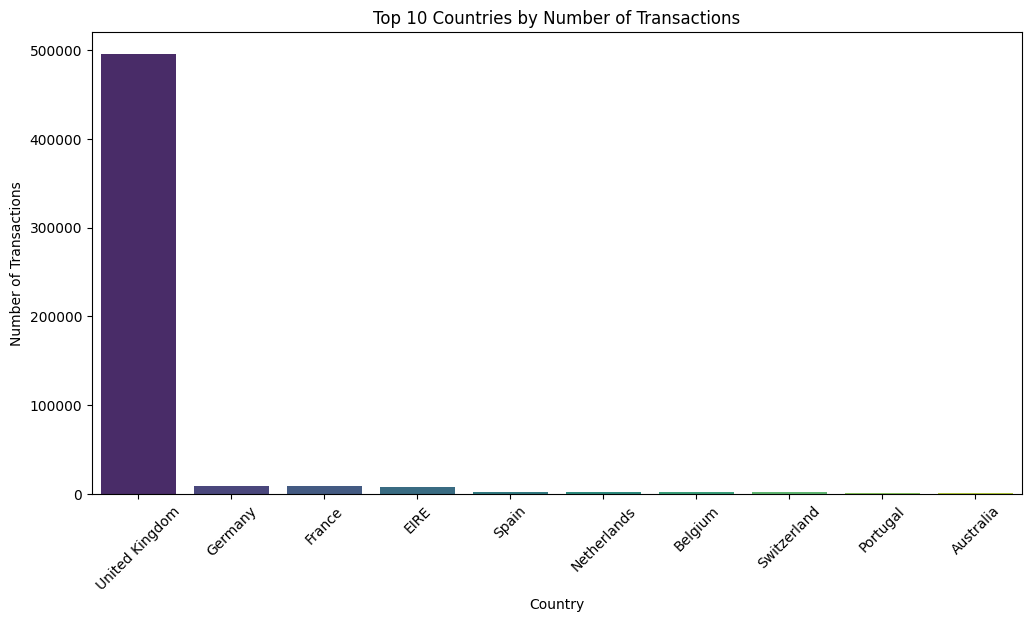

In [ ]:
# Bar plot of top 10 countries with the most transactions
plt.figure(figsize=(12, 6))
country_counts = data['Country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

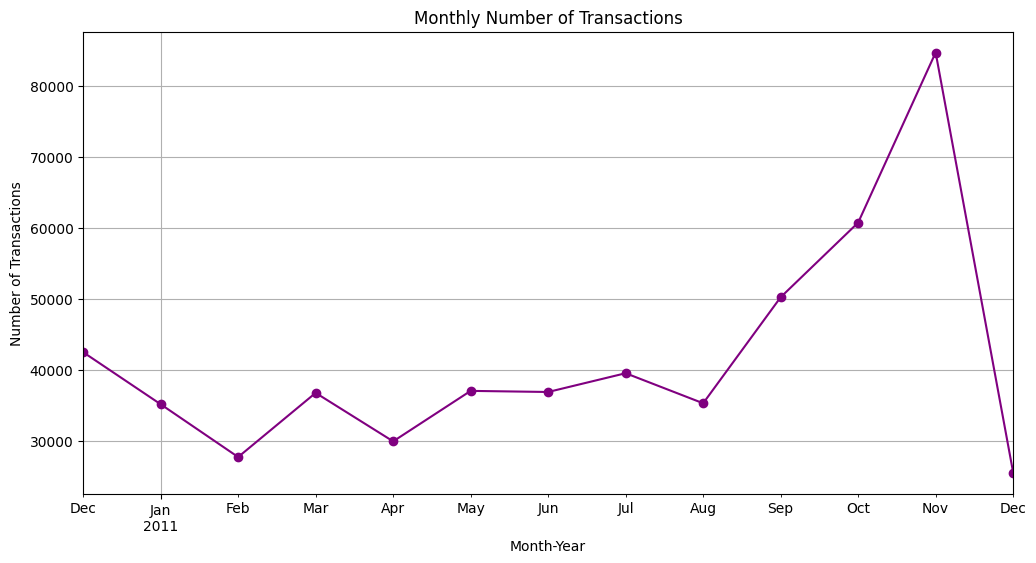

In [ ]:
# Time-based analysis: Monthly Transactions
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  # Ensure InvoiceDate is in datetime format
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')  # Extract Month and Year

# Monthly transactions
monthly_transactions = data.groupby('MonthYear').size()

plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Number of Transactions')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

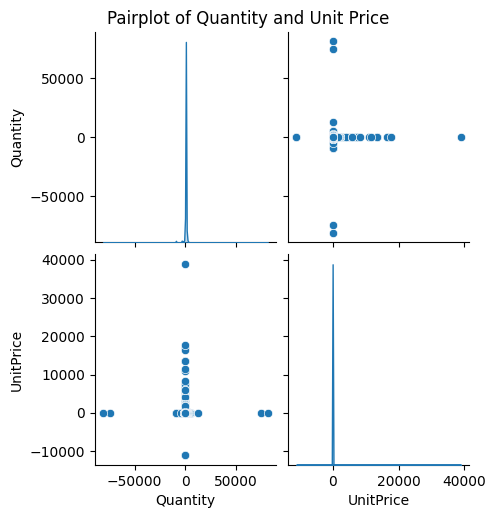

In [ ]:
# Pairplot for Quantity and UnitPrice (optional, for correlations)
sns.pairplot(data[['Quantity', 'UnitPrice']].dropna(), diag_kind='kde')
plt.suptitle('Pairplot of Quantity and Unit Price', y=1.02)
plt.show()

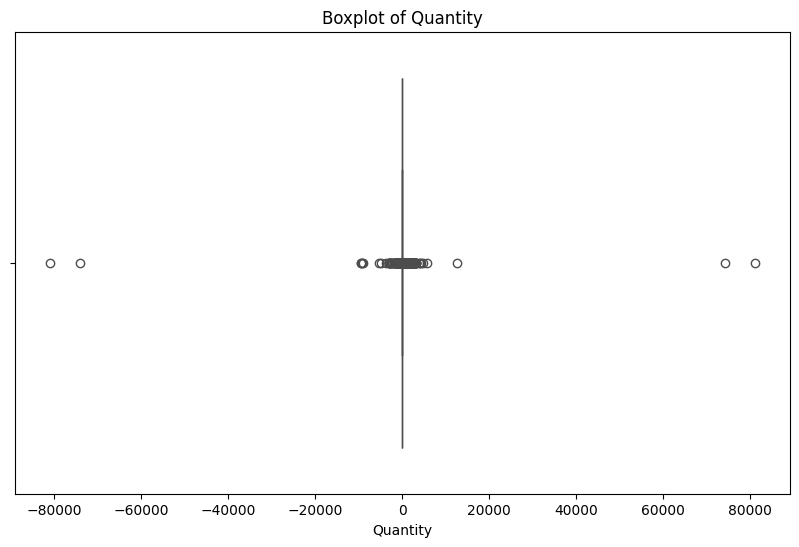

In [ ]:
# Boxplot for Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Quantity'], color='blue')
plt.title('Boxplot of Quantity')
plt.show()

In [ ]:
# Boxplot for UnitPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['UnitPrice'], color='green')
plt.title('Boxplot of Unit Price')
plt.show()

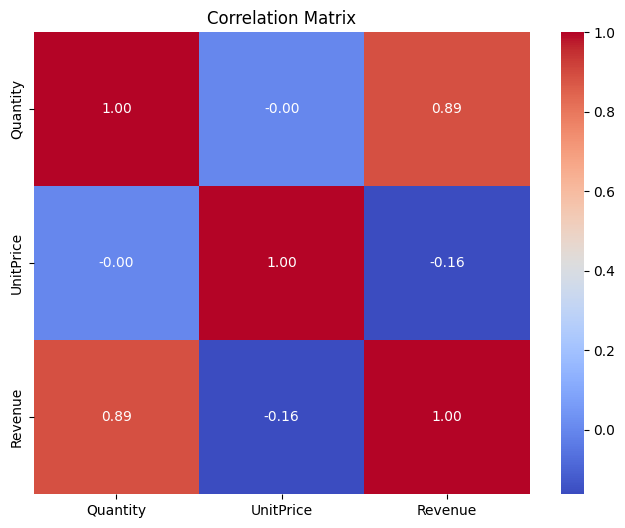

In [ ]:
# Create Revenue column
data['Revenue'] = data['Quantity'] * data['UnitPrice']
# Correlation heatmap
corr = data[['Quantity', 'UnitPrice', 'Revenue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check for anomalies
negative_quantity = data[data['Quantity'] < 0]
print(f"Number of transactions with negative quantities: {len(negative_quantity)}")

negative_price = data[data['UnitPrice'] < 0]
print(f"Number of transactions with negative prices: {len(negative_price)}")

Number of transactions with negative quantities: 10624
Number of transactions with negative prices: 2


In [ ]:
# Step 3: Handling Missing Values
# Drop rows where 'CustomerID' is missing (for clustering later)
data_cleaned = data.dropna(subset=['CustomerID']).copy()
print(f"\nData after dropping rows with missing CustomerID: {data_cleaned.shape[0]} rows")


Data after dropping rows with missing CustomerID: 406829 rows


In [ ]:
# Step 4: Feature Engineering
# Create a Revenue column (Quantity * UnitPrice)
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']

In [ ]:
# Convert InvoiceDate to datetime and extract useful features
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['Day'] = data_cleaned['InvoiceDate'].dt.day
data_cleaned['Hour'] = data_cleaned['InvoiceDate'].dt.hour

print("\nSample of feature-engineered data:")
display(data_cleaned.head())


Sample of feature-engineered data:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MonthYear,Revenue,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,2010,12,1,8


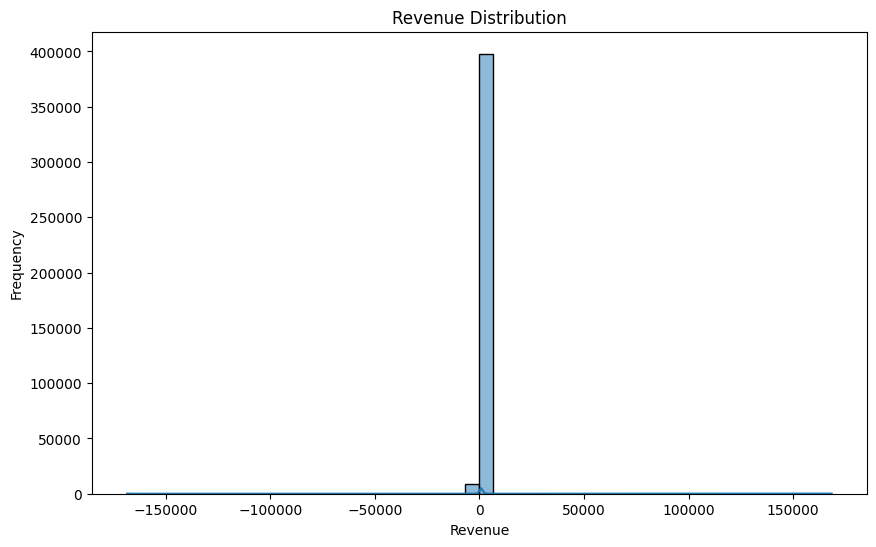

In [ ]:
# Step 5: Data Distribution and Visualizations
# 1. Revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Revenue'], bins=50, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

<ipython-input-20-1f8f3b3571af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


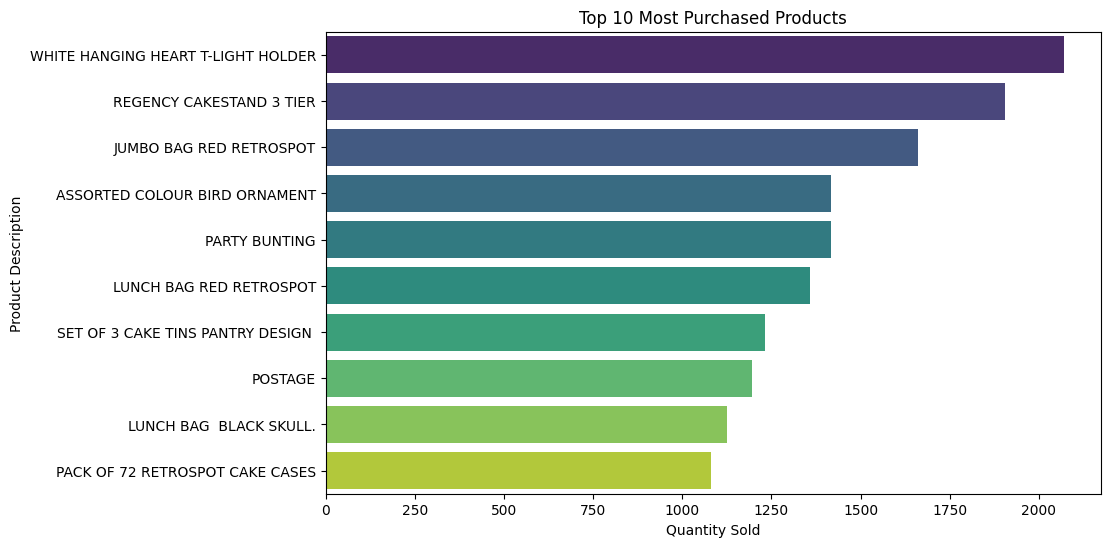

In [ ]:
# 2. Top 10 most purchased products
top_products = data_cleaned['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

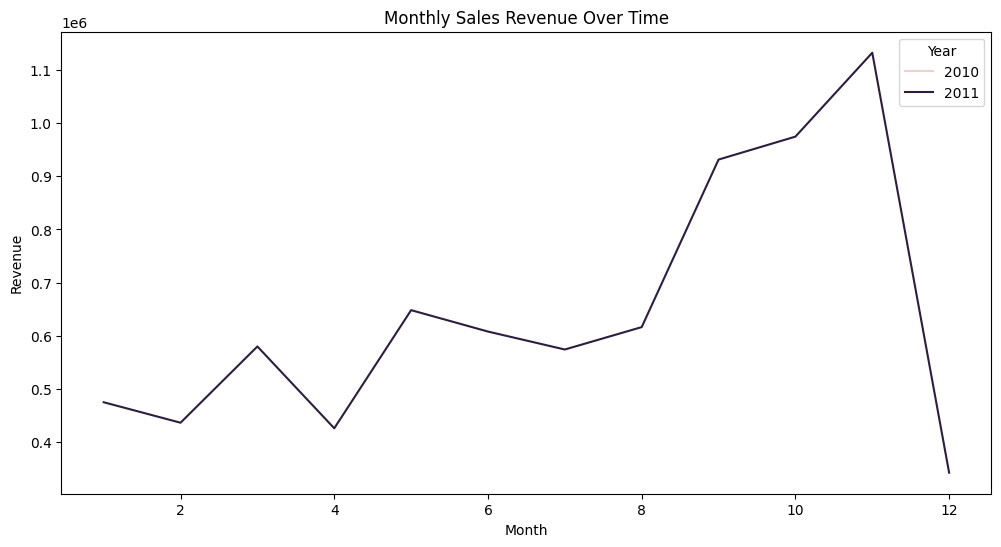

In [ ]:
# 3. Monthly sales revenue
monthly_revenue = data_cleaned.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue['Month'], y=monthly_revenue['Revenue'], hue=monthly_revenue['Year'])
plt.title('Monthly Sales Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Step 6: Check for anomalies
# Negative quantities or prices
negative_values = data_cleaned[(data_cleaned['Quantity'] < 0) | (data_cleaned['UnitPrice'] < 0)]
print(f"\nNumber of transactions with negative values: {negative_values.shape[0]}")


Number of transactions with negative values: 8905


In [ ]:
# Duplicate rows
duplicate_rows = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 5225


In [ ]:
# Step 7: Save cleaned data for further steps
data_cleaned.to_csv('cleaned_online_retail.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_online_retail.csv' for further analysis.")


Cleaned dataset saved as 'cleaned_online_retail.csv' for further analysis.
